# Assignment 5: Linear Regression
* BMIS 342 - Section 2
* Name: Nate Yoon
* Due 3/19/2021 at noon
* Purpose: To practice linear regression models through exercises.

In [4]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score


no display found. Using non-interactive Agg backend


In [5]:
# loads Tayko.csv into df

df = pd.read_csv('http://barney.gonzaga.edu/~chuang/data/dmba/Tayko.csv')



In [6]:
# Displaying dataframe to analyze
df

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,0,0,0,0,0,0,0,0,...,0,0,1,1701,1701,1,0,0,1,30
1996,1997,1,0,0,0,0,0,0,0,0,...,0,0,1,2633,2633,1,1,0,1,10
1997,1998,1,0,0,0,0,0,0,0,0,...,0,0,0,3394,3394,0,0,0,0,0
1998,1999,1,0,0,0,0,0,0,0,0,...,0,1,1,253,253,0,1,1,0,0


In [7]:
# Creating new dataframe with 6 categorical variables and 'Spending' for future calculations.

Tayko = df[['Web order', 'Gender=male','Address_is_res','US','Freq','last_update_days_ago','Spending']]

Tayko



,Web order,Gender=male,Address_is_res,US,Freq,last_update_days_ago,Spending
0,1,0,1,1,2,3662,128
1,1,1,0,1,0,2900,0
2,0,0,0,1,2,3883,127
3,0,1,0,1,1,829,0
4,0,0,0,1,1,869,0
...,...,...,...,...,...,...,...
1995,1,0,0,1,1,1701,30
1996,1,1,0,1,1,2633,10
1997,0,0,0,1,0,3394,0
1998,0,1,1,1,1,253,0


# 6.2a. Explore the spending amount by creating a pivot table for the categorical variables and computing the average and standard deviation of spendingin each category

In [8]:
# Creating pivot table for 'Web order' with the outcome being 'Spending'. Aggfunc's applied are 'mean' and 'std'

pd.pivot_table(Tayko, index = ['Web order'],values = ['Spending'], aggfunc = ['mean','std'])

,mean,std
,Spending,Spending
Web order,,
0,82.902439,173.417088
1,129.199531,200.463840


In [9]:
# Creating pivot table for 'Gender=male' with the outcome being 'Spending'. Aggfunc's applied are 'mean' and 'std'

pd.pivot_table(Tayko, index = ['Gender=male'],values = ['Spending'], aggfunc = ['mean','std'])

,mean,std
,Spending,Spending
Gender=male,,
0,107.339642,190.83233
1,98.350810,183.02006


In [10]:
# Creating pivot table for 'Address_is_res' with the outcome being 'Spending'. Aggfunc's applied are 'mean' and 'std'

pd.pivot_table(Tayko, index = ['Address_is_res'],values = ['Spending'], aggfunc = ['mean','std'])

,mean,std
,Spending,Spending
Address_is_res,,
0,105.306162,199.521159
1,93.174208,132.204281


In [11]:
# Creating pivot table for 'US' with the outcome being 'Spending'. Aggfunc's applied are 'mean' and 'std'

pd.pivot_table(Tayko, index = ['US'],values = ['Spending'], aggfunc = ['mean','std'])

,mean,std
,Spending,Spending
US,,
0,101.216524,174.844401
1,102.924803,189.275664


In [12]:
# Creating pivot table for 'Freq' with the outcome being 'Spending'. Aggfunc's applied are 'mean' and 'std'

pd.pivot_table(Tayko, index = ['Freq'],values = ['Spending'], aggfunc = ['mean','std'])

,mean,std
,Spending,Spending
Freq,,
0,0.000000,0.000000
1,66.322476,104.424412
2,123.479714,151.509696
3,234.993243,226.259754
4,306.061224,165.153642
5,459.862069,270.661719
6,556.750000,344.195009
7,642.125000,520.126478


In [13]:
# Creating pivot table for 'last_update_days_ago' with the outcome being 'Spending'. Aggfunc's applied are 'mean' and 'std'

pd.pivot_table(Tayko, index = ['last_update_days_ago'],values = ['Spending'], aggfunc = ['mean','std'])

,mean,std
,Spending,Spending
last_update_days_ago,,
1,109.000000,NaN
7,129.000000,NaN
9,196.000000,NaN
14,303.000000,NaN
15,71.000000,100.409163
...,...,...
4065,64.750000,58.987993
4096,75.666667,93.681731


# 6.2b. Explore the relationship between spending and each of the two continuous predictors by creating two scatterplots (Spending vs. Freq, and Spending vs. last_update_days_ago). Does there seem to be a linear relationship?

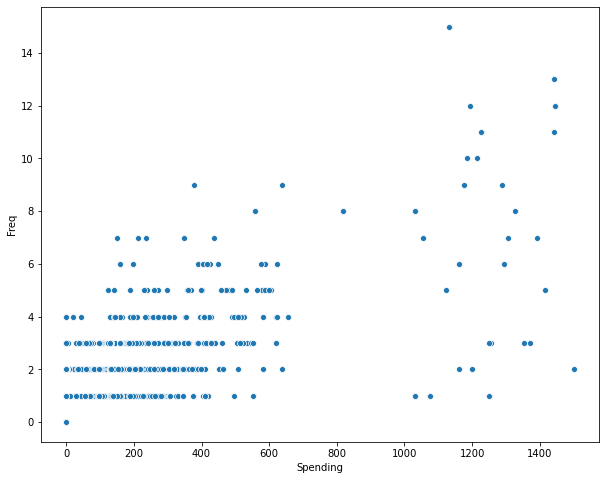

In [14]:

# scatterplot showing relationship between'Spending' vs. 'Freq'


%matplotlib inline

plt.figure(figsize=(10,8))
sns.scatterplot(x=Tayko['Spending'],
                y=Tayko['Freq'])


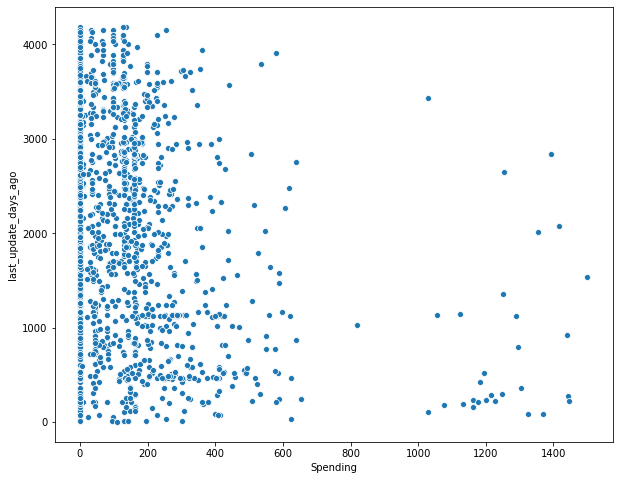

In [15]:

# scatterplot showing relationship between'Spending' vs. 'Freq' 

%matplotlib inline

plt.figure(figsize=(10,8))
sns.scatterplot(x=Tayko['Spending'],
                y=Tayko['last_update_days_ago'])

# 6.2c. To fit a predictive mode for Spending:

In [16]:
# i partition the 2000 records into training and validation sets.

Regression = Tayko[['Web order', 'Gender=male','Address_is_res','US','Freq','last_update_days_ago']]
y = Tayko['Spending']
train_X, valid_X, train_y, valid_y = train_test_split(Regression, 
                                                      y, 
                                                      test_size=0.2000, 
                                                      random_state=1)

In [17]:
# ii Run a multiple linear regression model for Spending vs. all six predictors. Give the estimated predictive equation.

# -- instantiate a linear regression object --
LR = LinearRegression()
LR.fit(train_X, train_y)

LinearRegression()

In [18]:
# printing the intercept, coefficient, and regression data below

print('intercept ', LR.intercept_)
print(pd.DataFrame({'Predictor': Regression.columns, 'coefficient': LR.coef_}))

# print performance measures
regressionSummary(train_y, LR.predict(train_X))

intercept  4.907509537072087
              Predictor  coefficient
0             Web order    17.480278
1           Gender=male    -8.112530
2        Address_is_res   -79.417788
3                    US    -3.714761
4                  Freq    90.846269
5  last_update_days_ago    -0.008003

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 118.6654
     Mean Absolute Error (MAE) : 76.4011


# iii. Based on this model, what type of purchaser is most likely to spend a large amount of money?

* The purchaser who is most frequent and a web order is most likley to spend a large amount of money. This is because the higher the coefficient variable, the more the dependent variable (spending) increases. Using a regression model, this makes sense to have this correlation with the coefficient. 

In [19]:
# vi. Evaluate the predictive accuracy of the model by examining its performance on the validation set.

from sklearn.linear_model import LogisticRegression

x = Regression            # x = train_set[:,:]
y = Tayko['Spending']
log_regress = LogisticRegression(solver = 'liblinear') # Instantiate an object of the class

log_regress.fit(X = x, y = y) # fit the model with data


LogisticRegression(solver='liblinear')

In [20]:
# Determining accuracy from the dataframe

print('--- Accuracy ---')
print(log_regress.score(X = x, y = Tayko['Spending'] ))

--- Accuracy ---
0.5


0.9175


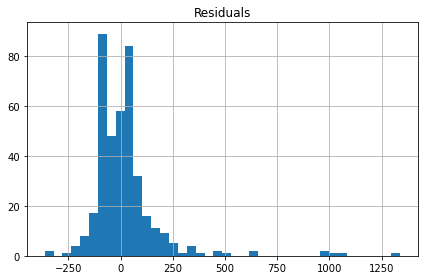

In [21]:
# vii. Create a histogram of the model residuals. QUESTIONS BELOW HISTOGRAM

# Using visual to show the distribution of the dataset.

LR_pred = LR.predict(valid_X)
all_residuals = valid_y - LR_pred

# Determine the percentage of datapoints with a residual in [-200, 200] = approx. 75\%
print(len(all_residuals[(all_residuals > -200) & (all_residuals < 200)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins = 40)

plt.tight_layout()
plt.show()

# Do they appear to follow a normal distribution?

* This dataset seems to closely follow a normal distribution, although there is a left skew in the data. There are also outlier to the right hat are high in value. 

# How does this affect the predictive performance of the model?

* This skew tells us that the majority of the perfmance is being pulled towards zero and negative values. These outliers can also skew the averages, deviations, etc., because of the abnormal large values compared to majority of data.